# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "video/hot_rod.mp4"

## Task 1: Define generator for reading video

In [4]:
def get_frames(file):
    video = cv2.VideoCapture(file)
    while video.isOpened():
        #ret -> true if new frame is retrived
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

## Task 2: Retrieve and display video frames

In [5]:
for f in get_frames(VFILE):
    if f is None:
        break
    cv2.imshow('frame', f)
    #exit if hit esc key
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()

## Task 2: Define function to get a single video frame

In [6]:
def get_frame(file, index):
    counter= 0
    video = cv2.VideoCapture(file)
    while video.isOpened():
        #ret -> true if new frame is retrived
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
    video.release()
    return None

## Task 2: Examining pixels

In [7]:
frame = get_frame(VFILE, 80)
print('shape ', frame.shape)
print('pixel at (0,0)', frame[0,0,:]) #bgr -> this is how opencv reads it

shape  (480, 640, 3)
pixel at (0,0) [47 19  0]


## Task 2: Displaying a video frame

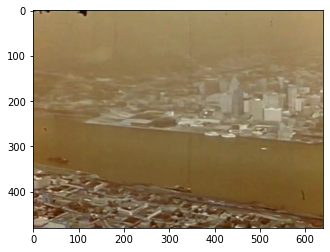

In [9]:
plt.imshow(frame) #rgb -> this is how matplotlib uses it

## Task 3: Fixing color convention

pixel at (0,0) [ 0 19 47]


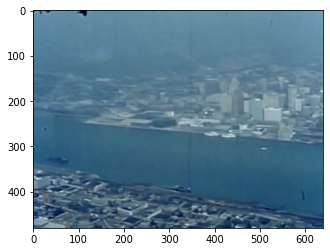

In [11]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print('pixel at (0,0)', fix_frame[0,0,:]) 
plt.imshow(fix_frame)

## Task 3: Cropping a video frame

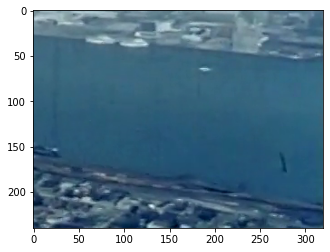

In [12]:
plt.imshow(fix_frame[240:480, 320:640])

## Task 3: Adjusting Brightness

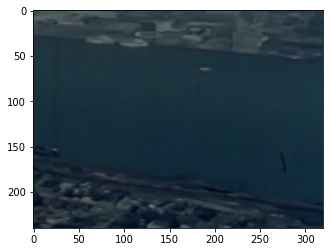

In [15]:
darker = 0.5* fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker[240:480, 320:640])

## Task 4: Drawing a circle

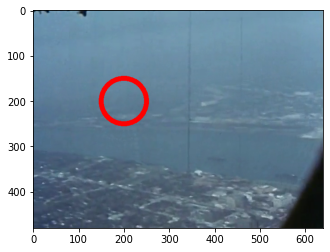

In [16]:
frame = get_frame(VFILE, 200)
cv2.circle(frame, center=(200,200),
          radius = 50,
          color = (0,0,255),
          thickness=10)
fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

## Task 4: Processing an entire video

In [17]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,
               text=str(counter),
               org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    cv2.imshow('frame', frame)#works better for lots of frames on notebook
    if cv2.waitKey(10) == 27:
        break
    counter +=1
cv2.destroyAllWindows()

## Task 5: Generating a new video file

In [18]:
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter('new.mp4', fourcc, 20, (640, 480))

counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,
               text=str(counter),
               org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    video_out.write(frame)
    counter +=1
video_out.release()

## Task 5: Finding the total frame count

In [19]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('frame count ', count)

frame count  3597


## Task 6: Creating a collage

In [ ]:
# Collage
COLLAGE = (3,5) # 3 rows, 5 columns

collage_frames = COLLAGE[0] * COLLAGE[1]
skip_frames = count // collage_frames

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter > 0 and counter % skip_frames == 0:
        frames.append(f)
    counter += 1

ROWS, COLS, _ = frames[0].shape

out = np.zeros( (ROWS*COLLAGE[0], COLS*COLLAGE[1], 3), dtype=np.uint8 )
idx = 0
for i in range(COLLAGE[0]):
    for j in range(COLLAGE[1]):
        out[ROWS*i:ROWS*(i+1), COLS*j:COLS*(j+1), :] = frames[idx]
        idx += 1

out = cv2.resize(out, (out.shape[1]//4, out.shape[0]//4) )
cv2.imshow('output', out)
cv2.waitKey(0)
cv2.destroyAllWindows()   
